<a href="https://colab.research.google.com/github/venkatagollapalli28-netizen/codsoft-/blob/main/SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📊 Dataset Head:
       TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

📈 Dataset Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB
None

🧮 Descriptive Stats:
                TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.90

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


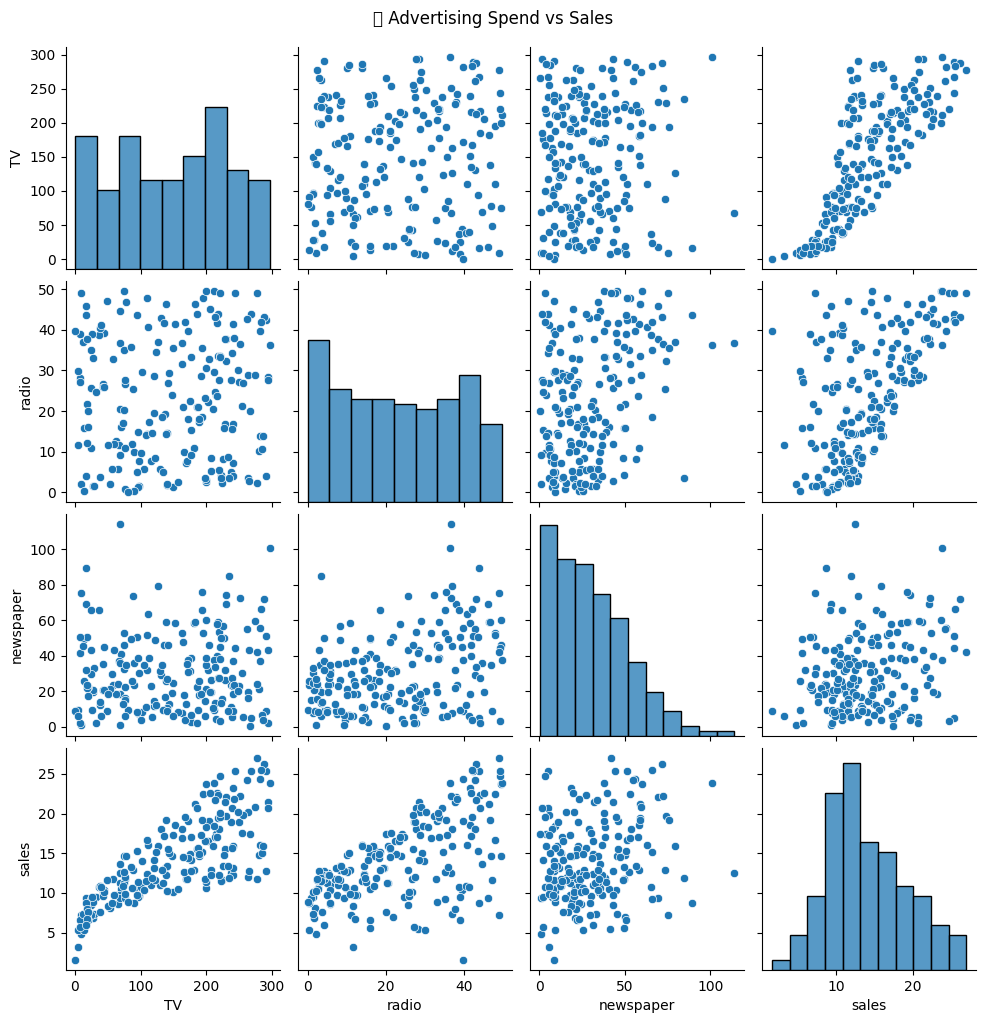

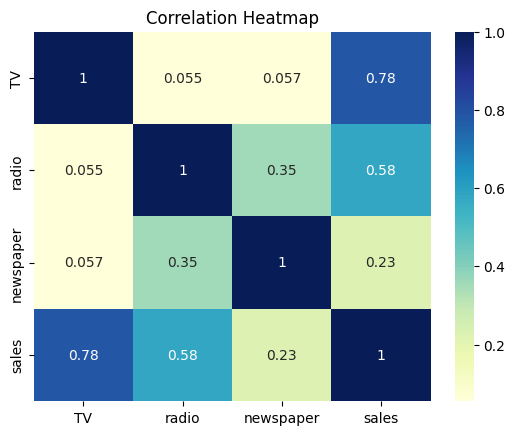


📌 LinearRegression Results:
MAE: 1.46
MSE: 3.17
RMSE: 1.78
R2 Score: 0.90

📌 Ridge Results:
MAE: 1.46
MSE: 3.17
RMSE: 1.78
R2 Score: 0.90

📌 Lasso Results:
MAE: 1.46
MSE: 3.17
RMSE: 1.78
R2 Score: 0.90

📌 RandomForest Results:
MAE: 0.62
MSE: 0.59
RMSE: 0.77
R2 Score: 0.98

✅ Best Model: RandomForest with R² Score = 0.98

📈 Predicted Sales for input {'TV': 150, 'radio': 25, 'newspaper': 15}: 15.19


In [ ]:
# SALES PREDICTION USING PYTHON

# Step 1: Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Step 2: Load Dataset
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

# Drop unnamed index column if present
df.drop(columns=["Unnamed: 0"], inplace=True, errors="ignore")

# Step 3: Quick Look at Data
print("📊 Dataset Head:\n", df.head())
print("\n📈 Dataset Info:\n")
print(df.info())
print("\n🧮 Descriptive Stats:\n", df.describe())

# Step 4: Visualize Relationships
sns.pairplot(df)
plt.suptitle("📊 Advertising Spend vs Sales", y=1.02)
plt.show()

sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Heatmap")
plt.show()

# Step 5: Prepare Data
X = df.drop("sales", axis=1)
y = df["sales"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Define and Train Models
models = {
    "LinearRegression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=0.1),
    "RandomForest": RandomForestRegressor(n_estimators=100, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    results[name] = {
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2
    }

    print(f"\n📌 {name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

# Step 7: Best Model Selection
best_model_name = max(results, key=lambda x: results[x]['R2'])
best_model = models[best_model_name]
print(f"\n✅ Best Model: {best_model_name} with R² Score = {results[best_model_name]['R2']:.2f}")

# Step 8: Predict New Sales
new_input = pd.DataFrame({
    'TV': [150],
    'radio': [25],
    'newspaper': [15]
})
prediction = best_model.predict(new_input)
print(f"\n📈 Predicted Sales for input {new_input.to_dict(orient='records')[0]}: {prediction[0]:.2f}")
